In [ ]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import sklearn
import tensorflow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sn
import random
from sklearn.metrics import accuracy_score
random.seed(10)
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from google.colab import files
from sklearn.metrics import accuracy_score
d = pd.read_csv('heart.csv')

In [ ]:
print(d)

     row.names  sbp  tobacco    ldl  ...  obesity alcohol  age  chd
0            1  160    12.00   5.73  ...    25.30   97.20   52    1
1            2  144     0.01   4.41  ...    28.87    2.06   63    1
2            3  118     0.08   3.48  ...    29.14    3.81   46    0
3            4  170     7.50   6.41  ...    31.99   24.26   58    1
4            5  134    13.60   3.50  ...    25.99   57.34   49    1
..         ...  ...      ...    ...  ...      ...     ...  ...  ...
457        459  214     0.40   5.98  ...    28.45    0.00   58    0
458        460  182     4.20   4.41  ...    28.61   18.72   52    1
459        461  108     3.00   1.59  ...    20.09   26.64   55    0
460        462  118     5.40  11.61  ...    27.35   23.97   40    0
461        463  132     0.00   4.82  ...    14.70    0.00   46    1

[462 rows x 11 columns]


In [ ]:
pd.get_dummies(data=d, columns=['famhist'])

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,64,28.45,0.00,58,0,1,0
458,460,182,4.20,4.41,32.10,52,28.61,18.72,52,1,1,0
459,461,108,3.00,1.59,15.23,40,20.09,26.64,55,0,1,0
460,462,118,5.40,11.61,30.79,64,27.35,23.97,40,0,1,0


In [ ]:
df = pd.get_dummies(data=d, columns=['famhist'])

In [ ]:
print(df)

     row.names  sbp  tobacco    ldl  ...  age  chd  famhist_Absent  famhist_Present
0            1  160    12.00   5.73  ...   52    1               0                1
1            2  144     0.01   4.41  ...   63    1               1                0
2            3  118     0.08   3.48  ...   46    0               0                1
3            4  170     7.50   6.41  ...   58    1               0                1
4            5  134    13.60   3.50  ...   49    1               0                1
..         ...  ...      ...    ...  ...  ...  ...             ...              ...
457        459  214     0.40   5.98  ...   58    0               1                0
458        460  182     4.20   4.41  ...   52    1               1                0
459        461  108     3.00   1.59  ...   55    0               1                0
460        462  118     5.40  11.61  ...   40    0               1                0
461        463  132     0.00   4.82  ...   46    1               0          

In [ ]:
scaler = StandardScaler()
dfert = pd.DataFrame(scaler.fit_transform(df))
print(dfert)

           0         1         2   ...        9         10        11
0   -1.726055  1.058564  1.823073  ...  1.373863 -1.185854  1.185854
1   -1.718581  0.277089 -0.790237  ...  1.373863  0.843274 -0.843274
2   -1.711107 -0.992806 -0.774980  ... -0.727875 -1.185854  1.185854
3   -1.703633  1.546985  0.842264  ...  1.373863 -1.185854  1.185854
4   -1.696158 -0.211332  2.171805  ...  1.373863 -1.185854  1.185854
..        ...       ...       ...  ...       ...       ...       ...
457  1.697129  3.696039 -0.705234  ... -0.727875  0.843274 -0.843274
458  1.704603  2.133091  0.123004  ...  1.373863  0.843274 -0.843274
459  1.712078 -1.481228 -0.138545  ... -0.727875  0.843274 -0.843274
460  1.719552 -0.992806  0.384553  ... -0.727875  0.843274 -0.843274
461  1.727026 -0.309016 -0.792417  ...  1.373863 -1.185854  1.185854

[462 rows x 12 columns]


In [ ]:
stancol = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
ds = d['row.names']
dsa = d[stancol].apply(lambda x: (x - x.mean()) / (x.std()))
ds = pd.concat([ds,dsa], axis = 1)
ds = pd.concat([ds,df['famhist_Absent'],df['famhist_Present'],d['chd']], axis = 1)
print(ds)

     row.names       sbp   tobacco  ...  famhist_Absent  famhist_Present  chd
0            1  1.057417  1.821099  ...               0                1    1
1            2  0.276789 -0.789382  ...               1                0    1
2            3 -0.991731 -0.774141  ...               0                1    0
3            4  1.545310  0.841352  ...               0                1    1
4            5 -0.211103  2.169453  ...               0                1    1
..         ...       ...       ...  ...             ...              ...  ...
457        459  3.692037 -0.704470  ...               1                0    0
458        460  2.130781  0.122871  ...               1                0    1
459        461 -1.479624 -0.138395  ...               1                0    0
460        462 -0.991731  0.384137  ...               1                0    0
461        463 -0.308682 -0.791559  ...               0                1    1

[462 rows x 12 columns]


In [ ]:
x = ds[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Absent', 'famhist_Present']]
y = ds['chd']
x = x.values
y = y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train)
y_pred = kmeans.predict(x_train)

In [ ]:
print(x[:, 0].size)
print(x_test[:, 0].size)
print(y_pred.size)
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_test.size)

462
231
231
2310
231
2310
231


In [ ]:
print(x[:, 0])

[ 1.05741729  0.27678925 -0.99173133  1.54530982 -0.21110328 -0.30868179
  0.17921074 -1.18688834 -1.18688834 -0.30868179  3.30172292 -0.21110328
 -0.99173133 -0.30868179 -1.28446684 -1.04052058 -0.89415282  0.37436775
  0.95983878 -0.69899581 -1.57720236 -0.30868179  0.56952476 -0.01594627
  0.17921074 -0.69899581 -0.99173133  0.3255785   0.27678925  0.37436775
 -0.11352478  0.95983878 -0.79657432 -0.6014173   0.47194626 -0.79657432
  0.08163223 -1.38204535 -0.40626029 -0.11352478 -0.99173133  0.27678925
 -0.89415282 -0.40626029 -1.18688834 -0.5038388   1.1549958  -1.08930983
 -1.18688834 -0.6014173  -0.79657432 -0.21110328  0.66710327 -0.21110328
  0.86226028  0.66710327 -0.99173133 -0.6014173  -1.72357012 -0.84536357
  0.17921074 -0.01594627  0.66710327  0.08163223 -0.40626029 -0.11352478
 -0.69899581 -1.28446684 -0.99173133 -0.79657432 -0.99173133 -0.40626029
 -0.40626029 -0.6014173  -0.5038388  -0.11352478 -0.21110328  0.08163223
  1.44773131 -1.47962385 -1.18688834  0.08163223  0

In [ ]:
print(x[:, 1])

[ 1.8210988  -0.78938174 -0.77414124  0.84135214  2.16945317  0.55831422
  0.09021304  0.09674468 -0.79155896 -0.79155896  0.51476992  2.27831391
 -0.79155896 -0.79155896  1.30945332 -0.45844509  0.84135214  1.49451658
 -0.22548311  2.25654176 -0.44102737  0.92844073 -0.72624251 -0.66092607
  3.17097198  0.07932696  0.51476992  1.18970651  0.0989219  -0.79155896
 -0.24290083 -0.56948305  0.64540281  1.11350399  0.40590918  0.13593455
  0.05755481  0.21866871 -0.79155896  1.64692162 -0.73059694 -0.7828501
 -0.79155896 -0.22330589 -0.79155896  0.22084592  0.81957999 -0.37571093
 -0.79155896  0.03578267 -0.79155896 -0.24725526 -0.59560963  0.9676306
 -0.13839452  0.51259271 -0.79155896  0.31882059 -0.78502731 -0.61738177
 -0.73059694 -0.54117926  1.40742799 -0.69358429 -0.79155896  0.81087114
  0.25785858 -0.70229315  0.17947884 -0.79155896 -0.79155896 -0.41707801
  0.42768133 -0.77196402 -0.70447037 -0.79155896 -0.79155896 -0.66092607
  0.1881877  -0.70447037 -0.13839452  0.98069389  0.2

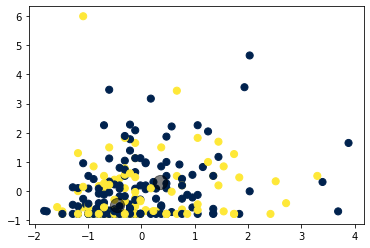

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=50, cmap='cividis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

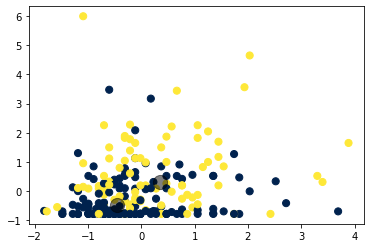

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='cividis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5367965367965368


In [ ]:
def shuffler (argument, dataframe):
  if argument == 'shuffle':
    dfs = sklearn.utils.shuffle(dataframe)
    return dfs
  if argument != 'shuffle':
    return dataframe

In [ ]:
def model1():
    model = tensorflow.keras.Sequential()
    model.add(Dense(units = 500, activation = 'relu',input_shape =(len(x_train), 1)))
    model.add(Dense(units= 500, activation= 'relu'))
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dense(units = 2, activation = 'softmax'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
y1 = tensorflow.keras.utils.to_categorical(y)

In [ ]:
print(x_train[:, 0].shape)
print(x_train[:, 1].shape)

(231,)
(231,)


In [ ]:
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.5, random_state=42)

In [ ]:
dfc1 = shuffler('shuffle', ds)
c1 = model1()
c1.fit(x_train, y1_train, epochs = 35, batch_size = 12, shuffle=False)
predictioncase1 = c1.predict(np.array(x_test))

Epoch 1/35
20/20 [==============================] - 1s 4ms/step - loss: 0.6157 - accuracy: 0.6840
Epoch 2/35
20/20 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.6883
Epoch 3/35
20/20 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.7273
Epoch 4/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4818 - accuracy: 0.7489
Epoch 5/35
20/20 [==============================] - 0s 8ms/step - loss: 0.4620 - accuracy: 0.7706
Epoch 6/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4441 - accuracy: 0.7922
Epoch 7/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4045 - accuracy: 0.8095
Epoch 8/35
20/20 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.8225
Epoch 9/35
20/20 [==============================] - 0s 6ms/step - loss: 0.3378 - accuracy: 0.8571
Epoch 10/35
20/20 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.8615
Epoch 11/35
20/20 [

In [ ]:
predictioncase1 = np.argmax(predictioncase1,axis = 1)

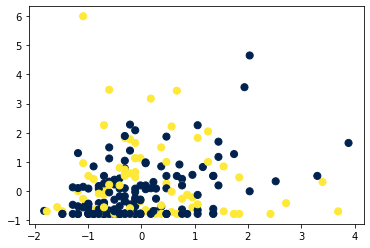

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = predictioncase1, s=50, cmap='cividis')

In [ ]:
y1_test = np.argmax(y1_test,axis = 1)

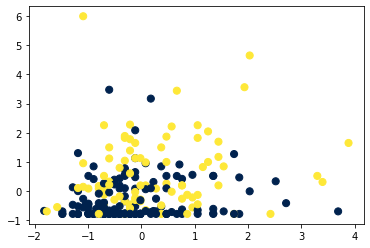

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y1_test, s=50, cmap='cividis')

In [ ]:
scaler = StandardScaler()
dfert = pd.DataFrame(scaler.fit_transform(df))

In [ ]:
print(x)

[[ 1.05741729  1.8210988   0.47789413 ...  0.62865426  0.
   1.        ]
 [ 0.27678925 -0.78938174 -0.15950708 ...  1.38161701  1.
   0.        ]
 [-0.99173133 -0.77414124 -0.6085852  ...  0.2179473   0.
   1.        ]
 ...
 [-1.47962385 -0.13839452 -1.52122784 ...  0.83400774  1.
   0.        ]
 [-0.99173133  0.38413703  3.31722678 ... -0.19275965  1.
   0.        ]
 [-0.30868179 -0.79155896  0.0384736  ...  0.2179473   0.
   1.        ]]


In [ ]:
xtemp = ds[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Absent', 'famhist_Present']]

In [ ]:
print(xtemp)

          sbp   tobacco       ldl  ...       age  famhist_Absent  famhist_Present
0    1.057417  1.821099  0.477894  ...  0.628654               0                1
1    0.276789 -0.789382 -0.159507  ...  1.381617               1                0
2   -0.991731 -0.774141 -0.608585  ...  0.217947               0                1
3    1.545310  0.841352  0.806252  ...  1.039361               0                1
4   -0.211103  2.169453 -0.598928  ...  0.423301               0                1
..        ...       ...       ...  ...       ...             ...              ...
457  3.692037 -0.704470  0.598614  ...  1.039361               1                0
458  2.130781  0.122871 -0.159507  ...  0.628654               1                0
459 -1.479624 -0.138395 -1.521228  ...  0.834008               1                0
460 -0.991731  0.384137  3.317227  ... -0.192760               1                0
461 -0.308682 -0.791559  0.038474  ...  0.217947               0                1

[462 rows x 10 

In [ ]:
covarriancematrix = PCA(n_components = 10)
covarriancematrix.fit(xtemp)
varratio = covarriancematrix.explained_variance_ratio_ 
variance=np.cumsum(covarriancematrix.explained_variance_ratio_*100)
print(variance) 

[ 33.45614576  47.56194864  60.05571454  70.07384359  79.0581904
  87.00417342  93.20356349  97.94248021 100.         100.        ]


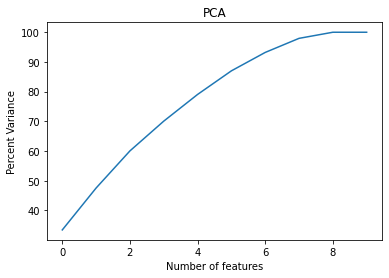

In [ ]:
plt.ylabel('Percent Variance')
plt.xlabel('Number of features')
plt.title('PCA')
plt.plot(variance)

In [ ]:
feat = covarriancematrix.fit_transform(xtemp)
PCD = pd.DataFrame(feat)
PCD.columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
print(PCD)

          PC0       PC1       PC2  ...       PC7       PC8           PC9
0    1.629656  3.055039  1.318300  ... -0.695502  0.400901  3.217996e-16
1    0.782074 -0.698043 -0.430385  ...  1.118572  0.609784 -5.672155e-17
2    0.122635 -1.042795 -0.294754  ... -0.299349 -0.261785  7.279072e-16
3    3.079833  0.025588 -0.104963  ... -0.661026 -0.129093  2.160641e-16
4    1.020309  1.887376  1.603272  ... -0.715164 -0.229559 -1.074990e-16
..        ...       ...       ...  ...       ...       ...           ...
457  2.170937 -0.527132  0.050236  ...  0.678565  0.081592 -4.683006e-17
458  1.624497  0.412915 -0.308013  ...  0.381718 -0.099945  8.145862e-17
459 -1.908059  1.686721 -1.061640  ...  1.026013  0.630653  8.683212e-18
460  1.251516 -1.716075  1.141778  ...  0.701209 -0.210011  2.734070e-17
461 -0.805844 -0.180376  0.022605  ...  0.581244 -2.102022 -2.968195e-17

[462 rows x 10 columns]


In [ ]:
xB1 = PCD[['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
yB1 = ds['chd']
xB1 = xB1.values
yB1 = yB1.values

In [ ]:
xB1_train, xB1_test, yB1_train, yB1_test = train_test_split(xB1, yB1, test_size=0.5, random_state=42)

In [ ]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(xB1_train)
y_predB1 = kmeans1.predict(xB1_train)

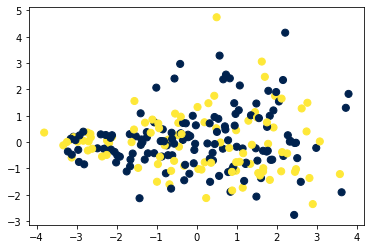

In [ ]:
plt.scatter(xB1_test[:, 0], xB1_test[:, 1], c = y_predB1, s=50, cmap='cividis')

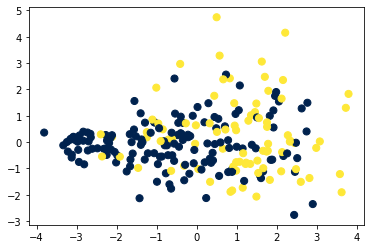

In [ ]:
plt.scatter(xB1_test[:, 0], xB1_test[:, 1], c = yB1_test, s=50, cmap='cividis')

In [ ]:
print(accuracy_score(yB1_test, y_predB1))

0.5367965367965368


In [ ]:
xB2_train, xB2_test, y1_train, y1_test = train_test_split(xB1, y1, test_size=0.5, random_state=42)

In [ ]:
dfc2 = shuffler('shuffle', PCD)
c2 = model1()
c2.fit(xB2_train, y1_train, epochs = 35, batch_size = 12, shuffle=False)
predictioncase2 = c2.predict(np.array(xB1_test))

Epoch 1/35
20/20 [==============================] - 1s 6ms/step - loss: 0.6148 - accuracy: 0.6883
Epoch 2/35
20/20 [==============================] - 0s 7ms/step - loss: 0.5595 - accuracy: 0.6926
Epoch 3/35
20/20 [==============================] - 0s 7ms/step - loss: 0.5113 - accuracy: 0.7273
Epoch 4/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4928 - accuracy: 0.7489
Epoch 5/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.7662
Epoch 6/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.7792
Epoch 7/35
20/20 [==============================] - 0s 7ms/step - loss: 0.4279 - accuracy: 0.7879
Epoch 8/35
20/20 [==============================] - 0s 7ms/step - loss: 0.4029 - accuracy: 0.8095
Epoch 9/35
20/20 [==============================] - 0s 6ms/step - loss: 0.3847 - accuracy: 0.8312
Epoch 10/35
20/20 [==============================] - 0s 6ms/step - loss: 0.3654 - accuracy: 0.8268
Epoch 11/35
20/20 [

In [ ]:
predictioncase2 = np.argmax(predictioncase2,axis = 1)

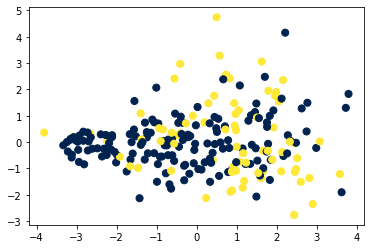

In [ ]:
plt.scatter(xB2_test[:, 0], xB2_test[:, 1], c = predictioncase2, s=50, cmap='cividis')

In [ ]:
y1_test = np.argmax(y1_test,axis = 1)

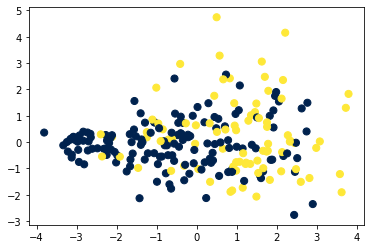

In [ ]:
plt.scatter(xB2_test[:, 0], xB2_test[:, 1], c = y1_test, s=50, cmap='cividis')

BONUS A

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
xs = ds[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Absent', 'famhist_Present']]
ys = ds['chd']

In [ ]:
LR = LinearRegression()
LR.fit(xs, ys)
yspred = LR.predict(xs)
mae = mean_absolute_error(ys, yspred)
mse = mean_squared_error(ys, yspred)
rmse = math.sqrt(mse)
r2score = r2_score(ys, yspred)
print("Accuracy Metrics:")
print("mae = " + str(mae))
print("mse = " + str(mse))
print("rmse = " + str(rmse))
print("r2 score = " + str(r2score))

Accuracy Metrics:
mae = 0.3569074762301098
mse = 0.17295295254177906
rmse = 0.415876126438846
r2 score = 0.23601469366044092


BONUS B

In [ ]:
LR.fit(xB1, yB1)
yspred2 = LR.predict(xB1)
mae = mean_absolute_error(yB1, yspred2)
mse = mean_squared_error(yB1, yspred2)
rmse = math.sqrt(mse)
r2score = r2_score(yB1, yspred2)
print("Accuracy Metrics:")
print("mae = " + str(mae))
print("mse = " + str(mse))
print("rmse = " + str(rmse))
print("r2 score = " + str(r2score))

Accuracy Metrics:
mae = 0.36078956372620463
mse = 0.17398212334557042
rmse = 0.4171116437425002
r2 score = 0.23146853610571305
